In [1]:

import os
import pandas as pd
from config import BASE_DIR

domain = "dss"
exp_name = "gae_init"
BASELINE_DIR = f"{BASE_DIR}/experiments/{domain}/baselines"
BASELINE_GNN_DIR = f"{BASE_DIR}/experiments/{domain}/gnn/{exp_name}"


In [2]:

def list_files(dir):
    filenames = []
    for root, dirs, files in os.walk(dir):
        for file in files:
            filenames.append(file)
    return filenames


print(list_files(BASELINE_DIR))
print(list_files(BASELINE_GNN_DIR))

['composition_unsupervised.csv', 'section_supervised.csv', 'section_unsupervised.csv', 'book_unsupervised.csv', 'composition_supervised.csv', 'book_supervised.csv']
['gae_init_composition_2_adj_types.csv', 'gae_init_book_2_adj_types.csv']


In [3]:
task_by_domain = {"dss": ["book", "composition", "section"], "bible": ["book"]}
tasks = task_by_domain[domain]
if domain == "dss":
    tasks.remove("section")
    tasks.remove("composition")
gnn_name_fomrat = "{}_{}_2_adj_types.csv"

COMPARISON_SCHEME = ["task", "vectorizer", "model", "silhouette", 
                     "clustering_accuracy", 
                     "jaccard", "dasgupta",
                     "hidden_dim", "adj_type"]

compare_list = {
    task: [
        f"{BASELINE_DIR}/{task}_unsupervised.csv",
        f"{BASELINE_GNN_DIR}/{gnn_name_fomrat.format(exp_name, task)}"
    ]
    for task in tasks
}

In [4]:
gnn = pd.read_csv(compare_list["book"][1])
gnn.sort_values(by=["jaccard"],ascending=False)

,silhouette,jaccard,dasgupta,clustering_accuracy,auc,ap,epoch,num_adjs,epochs,hidden_dim,latent_dim,distance,learning_rate,threshold,bert_model,adj_type,num_edges
2,0.248235,0.206518,0.858925,0.458204,0.933846,0.917289,2,2,50,300,100,cosine,0.001,0.99,dicta-il/BEREL,tfidf & trigram,13529
0,0.261917,0.202181,0.889218,0.442724,0.941948,0.930991,2,1,50,300,100,cosine,0.001,0.99,dicta-il/BEREL,tfidf,9391
23,0.236457,0.197467,0.857588,0.438596,0.925300,0.909709,2,2,50,500,100,cosine,0.001,0.99,dicta-il/BEREL,tfidf & trigram,13529
32,0.271952,0.196830,0.873326,0.441692,0.945689,0.933336,1,2,50,500,100,cosine,0.001,0.99,dicta-il/MsBERT,tfidf & trigram,13529
20,0.252623,0.195817,0.840805,0.428277,0.922625,0.905507,1,2,50,300,100,cosine,0.001,0.99,yonatanlou/dictabert-finetuned-DSS-maskedLM,tfidf & trigram,13529
29,0.250183,0.195515,0.879658,0.433437,0.895845,0.868376,0,2,50,500,100,cosine,0.001,0.99,dicta-il/dictabert,tfidf & trigram,13529
8,0.251249,0.189005,0.846860,0.426213,0.928510,0.914124,1,2,50,300,100,cosine,0.001,0.99,dicta-il/dictabert,tfidf & trigram,13529
11,0.265642,0.186426,0.864894,0.444788,0.911551,0.884908,2,2,50,300,100,cosine,0.001,0.99,dicta-il/MsBERT,tfidf & trigram,13529
41,0.259791,0.185321,0.866197,0.417957,0.918047,0.895106,17,2,50,500,100,cosine,0.001,0.99,yonatanlou/dictabert-finetuned-DSS-maskedLM,tfidf & trigram,13529
21,0.252931,0.185109,0.857237,0.439628,0.954553,0.945303,2,1,50,500,100,cosine,0.001,0.99,dicta-il/BEREL,tfidf,9391


<Figure size 800x600 with 0 Axes>

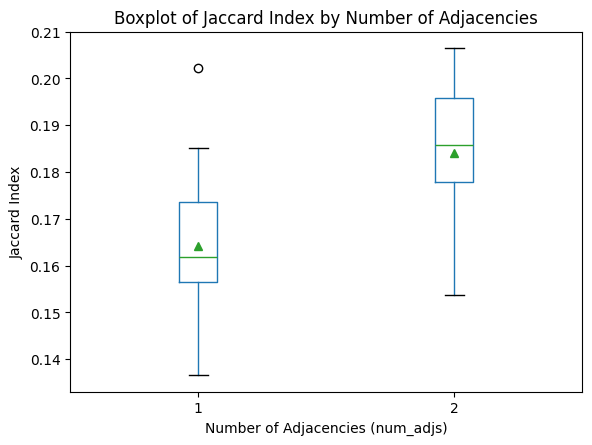

<Figure size 800x600 with 0 Axes>

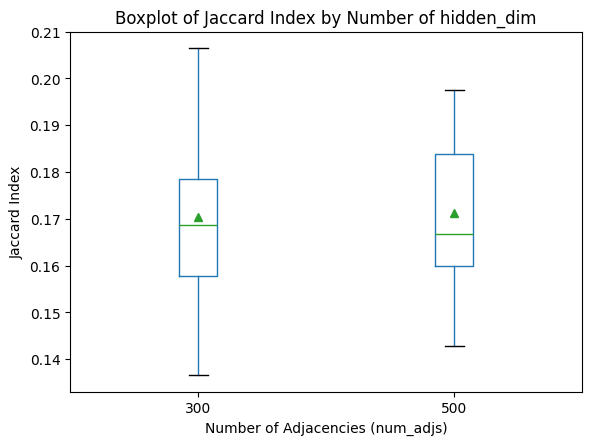

<Figure size 800x600 with 0 Axes>

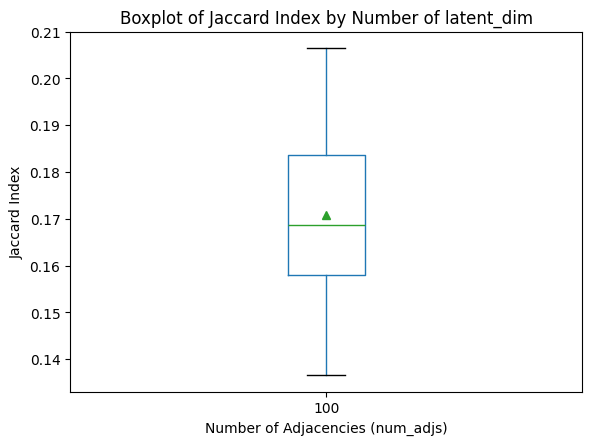

<Figure size 800x600 with 0 Axes>

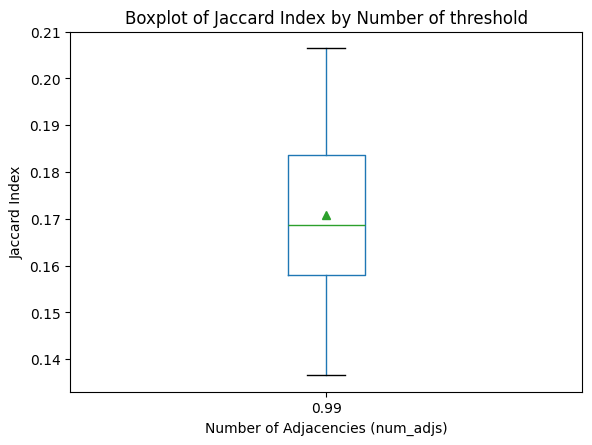

In [5]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
gnn.boxplot(column="jaccard", by="num_adjs", grid=False, showmeans=True)
plt.title("Boxplot of Jaccard Index by Number of Adjacencies")
plt.suptitle("")  # Suppress the automatic subtitle
plt.xlabel("Number of Adjacencies (num_adjs)")
plt.ylabel("Jaccard Index")
plt.show()

plt.figure(figsize=(8, 6))
gnn.boxplot(column="jaccard", by="hidden_dim", grid=False, showmeans=True)
plt.title("Boxplot of Jaccard Index by Number of hidden_dim")
plt.suptitle("")  # Suppress the automatic subtitle
plt.xlabel("Number of Adjacencies (num_adjs)")
plt.ylabel("Jaccard Index")
plt.show()

plt.figure(figsize=(8, 6))
gnn.boxplot(column="jaccard", by="latent_dim", grid=False, showmeans=True)
plt.title("Boxplot of Jaccard Index by Number of latent_dim")
plt.suptitle("")  # Suppress the automatic subtitle
plt.xlabel("Number of Adjacencies (num_adjs)")
plt.ylabel("Jaccard Index")
plt.show()

plt.figure(figsize=(8, 6))
gnn.boxplot(column="jaccard", by="threshold", grid=False, showmeans=True)
plt.title("Boxplot of Jaccard Index by Number of threshold")
plt.suptitle("")  # Suppress the automatic subtitle
plt.xlabel("Number of Adjacencies (num_adjs)")
plt.ylabel("Jaccard Index")
plt.show()

In [6]:

def generate_all_results(compare_list, tasks, main_metric):
    results = []
    for task in tasks:
        baseline = pd.read_csv(compare_list[task][0])
        baseline["task"] = task
        baseline["adj_type"] = None
        baseline["hidden_dim"] = None
        baseline["model"] = "Only Embeddings"
        baseline = baseline.rename(columns={"vectorizer_type": "vectorizer"})
        results.append(baseline[COMPARISON_SCHEME].to_dict(orient="records"))

        gnn = pd.read_csv(compare_list[task][1])
        gnn = gnn.rename(columns={"bert_model": "vectorizer_type"})
        gnn["model"] = "GVAE"
        gnn["task"] = task
        gnn = gnn.rename(columns={"vectorizer_type": "vectorizer"})
        max_idx = gnn.groupby('vectorizer')[main_metric].idxmax()

        max_test_acc_rows = gnn.loc[max_idx]
        max_test_acc_rows["model"] = "GVAE"
        max_test_acc_rows["task"] = task
        results.append(max_test_acc_rows[COMPARISON_SCHEME].to_dict(orient="records"))

    all_results = pd.DataFrame([item for sublist in results for item in sublist])
    all_results = all_results.sort_values(by=main_metric, ascending=False)
    return all_results


In [7]:

def get_group_by_vectorizer(i):
    if "yonatanlou" in i:
        return 'fine_tuned'
    elif "dicta" in i or "onlplab" in i:
        return 'pre_trained_bert'
    else:
        return 'classic_text_features'


def generate_color_map(df, col, group_name, base_color="PuOr", base_color_by_group=None):
    groups = df.groupby(group_name)[col].apply(list).to_dict()
    num_groups = df[col].nunique()
    all_colors = list(sns.color_palette(base_color, num_groups))
    color_map = {}
    i = 0
    if not base_color_by_group:
        for group, items in groups.items():
            items = list(set(items))

            for item in items:
                color_map[item] = all_colors[i]
                i += 1
        return color_map

    # Function to generate shades of a base color
    def generate_shades(base_color, num_shades):
        # return sns.hls_palette(num_shades, h=base_color, l=0.5, s=0.5)

        return sns.color_palette(base_color, n_colors=num_shades + 1)

    # Create the color map
    color_map = {}
    for group, items in groups.items():
        shades = generate_shades(base_color_by_group[group], len(items))
        for item, shade in zip(items, shades):
            color_map[item] = shade
    return color_map





In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


def generate_bar_plot(all_results, x_col, y_col, hue_col, vectorizer_type_col, color_map, filename,
                      which_hue_cols=False, base_color_by_group=None):
    # Create a figure and a set of subplots
    fig, axes = plt.subplots(nrows=len(all_results['task'].unique()), ncols=1,
                             figsize=(12, 6 * len(all_results['task'].unique())), sharey=False)
    all_results['task'] = all_results['task'].replace("section", "sectarian")

    # Create a custom order based on base_color_by_group
    if base_color_by_group:
        custom_order = []
        for group in base_color_by_group.keys():
            group_items = all_results[all_results['vectorizer_type'] == group][hue_col].unique()
            custom_order.extend(group_items)
    else:
        custom_order = None

    # Generate colors for each group
    if base_color_by_group:
        group_colors = {}
        for group, cmap_name in base_color_by_group.items():
            cmap = plt.get_cmap(cmap_name)
            group_colors[group] = cmap(0.6)  # Use a specific point in the colormap

    for i, task in enumerate(all_results['task'].unique()):
        # Filter data for the current task
        task_data = all_results[all_results['task'] == task]
        if which_hue_cols is not None:
            task_data = task_data[task_data[hue_col].isin(which_hue_cols)]

        # Sort the data according to the custom order
        if custom_order:
            task_data[hue_col] = pd.Categorical(task_data[hue_col], categories=custom_order, ordered=True)
            task_data = task_data.sort_values(hue_col)

        # Create the plot with sorted bars
        ax = axes[i] if len(all_results['task'].unique()) > 1 else axes
        sns.barplot(ax=ax, x=x_col, y=y_col, hue=hue_col, data=task_data, palette=color_map, hue_order=custom_order)
        ax.set_title(f'{y_col.capitalize()} Metric By {hue_col.capitalize()} For {task.capitalize()} Clustering ({domain.capitalize()})', fontsize=16)

        # Adjusting the y-axis limits
        min_y_col = task_data[y_col].min()
        max_y_col = task_data[y_col].max()
        padding = (max_y_col - min_y_col) * 0.1
        ax.set_ylim(min_y_col - padding, max_y_col + padding)

        ax.set_xlabel('Model', fontsize=14)
        ax.set_ylabel(y_col, fontsize=14)
        ax.tick_params(axis='x', rotation=45)

        # Customize legend
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, title='Vectorizer', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        ax.grid(alpha=0.5)

    plt.tight_layout()
    if filename:
        plt.savefig(filename)
    plt.show()

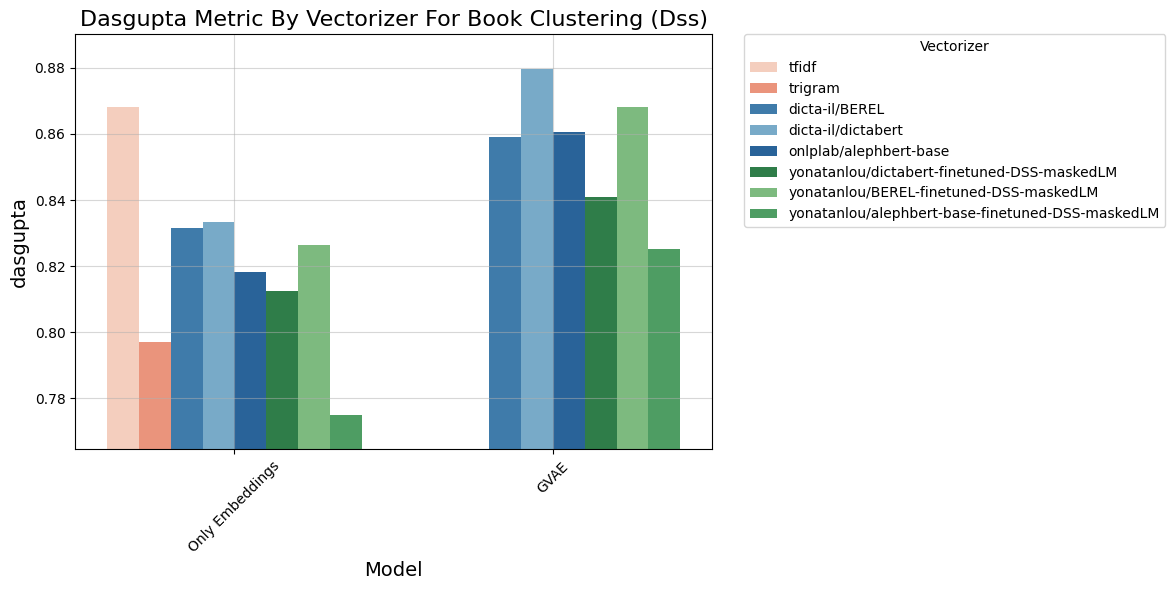

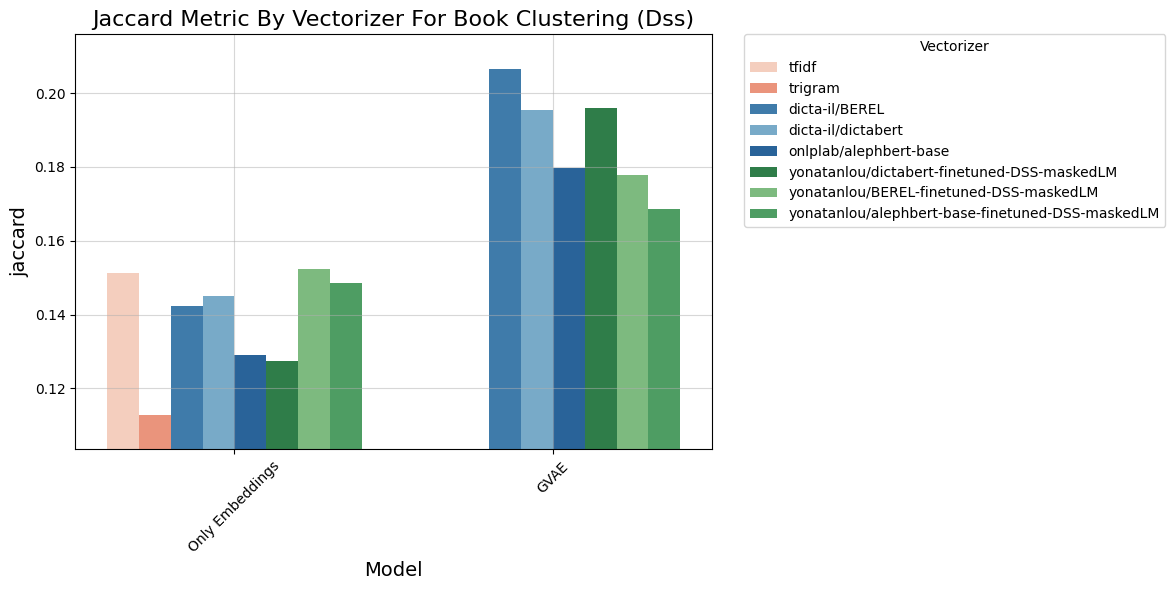

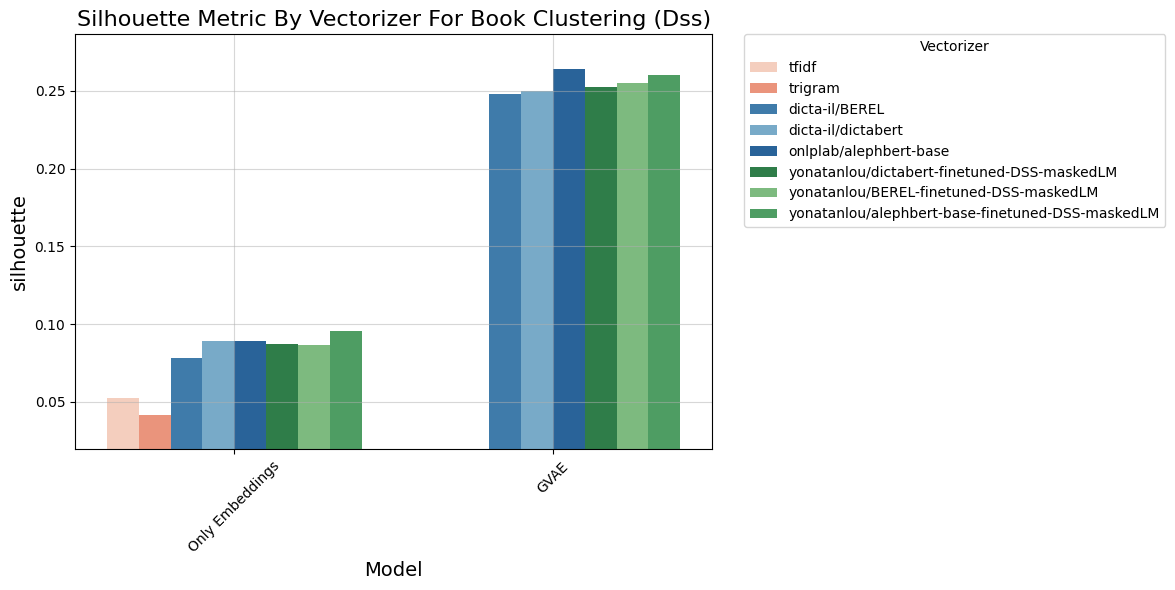

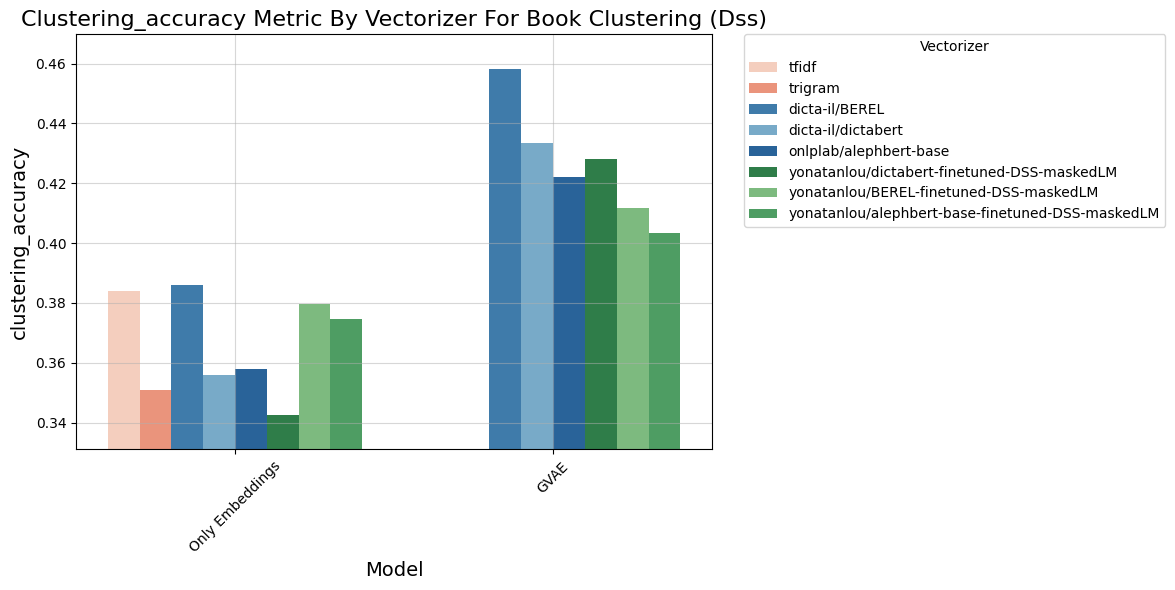

In [9]:
base_color_by_group = {
    'classic_text_features': "Reds",  # Red
    'pre_trained_bert': "Blues",  # Green
    'fine_tuned': "Greens"  # Blue
}

file_name = f"{BASE_DIR}/experiments/dss/gnn/comparsion_plot_all_tasks.png"
file_name = None
# hue_cols = list(all_results[all_results["model"]=="GCN"]["vectorizer"].unique())+["trigram"]


for main_metric in ["dasgupta", "jaccard", "silhouette",
                    "clustering_accuracy", 
                    ]:
    all_results = generate_all_results(compare_list, tasks, "jaccard")
    all_results["vectorizer_type"] = all_results["vectorizer"].apply(get_group_by_vectorizer)
    color_map = generate_color_map(all_results, "vectorizer", "vectorizer_type", "RdYlGn", base_color_by_group)
    hue_cols = all_results["vectorizer"].unique()
    all_results = all_results[~all_results["vectorizer"].isin(["dicta-il/MsBERT", "starr"])]
    all_results = all_results[all_results["task"] != "section"]
    plot_obj = generate_bar_plot(all_results, "model", main_metric, "vectorizer", "vectorizer_type", color_map,
                                 filename=file_name, which_hue_cols=hue_cols, base_color_by_group=base_color_by_group)

In [10]:
# all_results
print(pd.pivot_table(all_results, index="model", columns="vectorizer", values="jaccard", aggfunc="mean").T.to_latex(float_format="%.2f"))

\begin{tabular}{lrr}
\toprule
model & GVAE & Only Embeddings \\
vectorizer &  &  \\
\midrule
dicta-il/BEREL & 0.21 & 0.14 \\
dicta-il/dictabert & 0.20 & 0.14 \\
onlplab/alephbert-base & 0.18 & 0.13 \\
tfidf & NaN & 0.15 \\
trigram & NaN & 0.11 \\
yonatanlou/BEREL-finetuned-DSS-maskedLM & 0.18 & 0.15 \\
yonatanlou/alephbert-base-finetuned-DSS-maskedLM & 0.17 & 0.15 \\
yonatanlou/dictabert-finetuned-DSS-maskedLM & 0.20 & 0.13 \\
\bottomrule
\end{tabular}



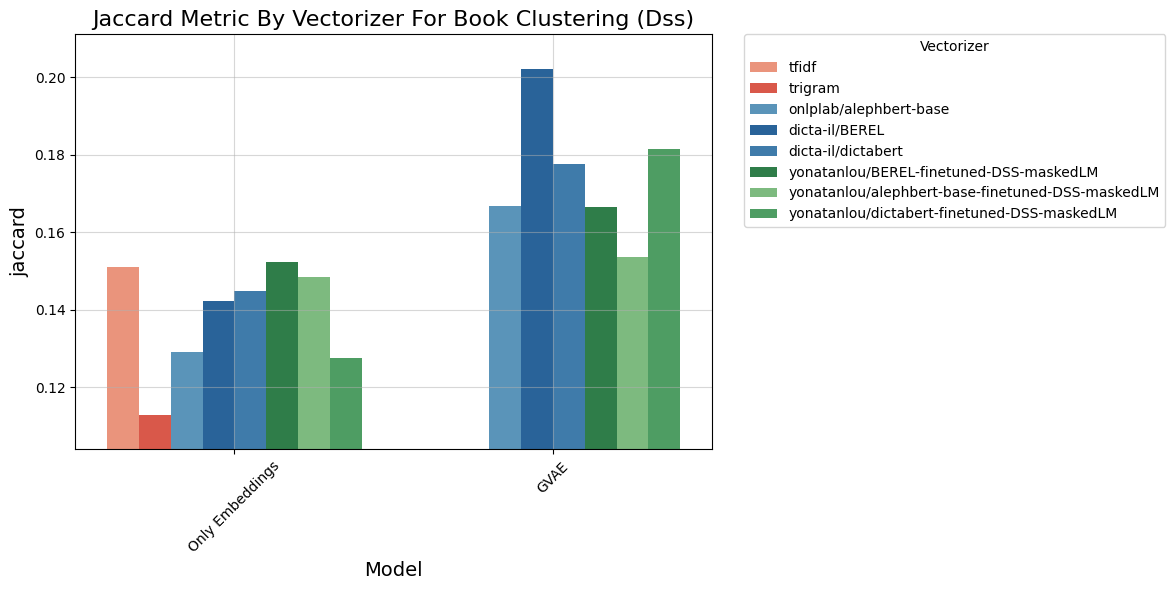

In [11]:
for main_metric in ["jaccard", 
                    ]:
    all_results = generate_all_results(compare_list, tasks, "silhouette")
    all_results["vectorizer_type"] = all_results["vectorizer"].apply(get_group_by_vectorizer)
    color_map = generate_color_map(all_results, "vectorizer", "vectorizer_type", "RdYlGn", base_color_by_group)
    hue_cols = all_results["vectorizer"].unique()
    all_results = all_results[~all_results["vectorizer"].isin(["dicta-il/MsBERT", "starr"])]
    all_results = all_results[all_results["task"] != "section"]
    plot_obj = generate_bar_plot(all_results, "model", main_metric, "vectorizer", "vectorizer_type", color_map,
                                 filename=file_name, which_hue_cols=hue_cols, base_color_by_group=base_color_by_group)

In [12]:

results_gnn = []
for task in [tasks[0]]:
    gnn = pd.read_csv(compare_list[task][1])
    gnn = gnn.rename(columns={"bert_model": "vectorizer"})

    gnn["model"] = "GVAE"
    gnn["task"] = task

    results_gnn.append(gnn.to_dict(orient="records"))

all_results_gnn = pd.DataFrame([item for sublist in results_gnn for item in sublist])
all_results_gnn

,silhouette,jaccard,dasgupta,clustering_accuracy,auc,ap,epoch,num_adjs,epochs,hidden_dim,latent_dim,distance,learning_rate,threshold,vectorizer,adj_type,num_edges,model,task
0,0.261917,0.202181,0.889218,0.442724,0.941948,0.930991,2,1,50,300,100,cosine,0.001,0.99,dicta-il/BEREL,tfidf,9391,GVAE,book
1,0.220582,0.168750,0.841739,0.389061,0.948601,0.928032,1,1,50,300,100,cosine,0.001,0.99,dicta-il/BEREL,trigram,9391,GVAE,book
2,0.248235,0.206518,0.858925,0.458204,0.933846,0.917289,2,2,50,300,100,cosine,0.001,0.99,dicta-il/BEREL,tfidf & trigram,13529,GVAE,book
3,0.266028,0.153813,0.835963,0.392157,0.972178,0.962819,10,1,50,300,100,cosine,0.001,0.99,onlplab/alephbert-base,tfidf,9391,GVAE,book
4,0.252514,0.137748,0.795934,0.353973,0.969504,0.964851,37,1,50,300,100,cosine,0.001,0.99,onlplab/alephbert-base,trigram,9391,GVAE,book
5,0.264905,0.178577,0.863790,0.417957,0.949493,0.941114,17,2,50,300,100,cosine,0.001,0.99,onlplab/alephbert-base,tfidf & trigram,13529,GVAE,book
6,0.260999,0.177535,0.884919,0.417957,0.945337,0.933021,1,1,50,300,100,cosine,0.001,0.99,dicta-il/dictabert,tfidf,9391,GVAE,book
7,0.231253,0.162027,0.833168,0.388029,0.952924,0.940144,1,1,50,300,100,cosine,0.001,0.99,dicta-il/dictabert,trigram,9391,GVAE,book
8,0.251249,0.189005,0.846860,0.426213,0.928510,0.914124,1,2,50,300,100,cosine,0.001,0.99,dicta-il/dictabert,tfidf & trigram,13529,GVAE,book
9,0.268649,0.168097,0.868979,0.421053,0.955873,0.939362,2,1,50,300,100,cosine,0.001,0.99,dicta-il/MsBERT,tfidf,9391,GVAE,book


In [13]:

results_gnn = []
for task in tasks:
    gnn = pd.read_csv(compare_list[task][1])
    gnn = gnn.rename(columns={"bert_model": "vectorizer"})

    gnn["model"] = "GVAE"
    gnn["task"] = task

    results_gnn.append(gnn.to_dict(orient="records"))

all_results_gnn = pd.DataFrame([item for sublist in results_gnn for item in sublist])

MAIN_METRIC = "jaccard"
all_results_gnn[all_results_gnn["model"] == "GVAE"].sort_values(by=MAIN_METRIC, ascending=False).groupby("task").head(
    2).sort_values(by="vectorizer")

,silhouette,jaccard,dasgupta,clustering_accuracy,auc,ap,epoch,num_adjs,epochs,hidden_dim,latent_dim,distance,learning_rate,threshold,vectorizer,adj_type,num_edges,model,task
2,0.248235,0.206518,0.858925,0.458204,0.933846,0.917289,2,2,50,300,100,cosine,0.001,0.99,dicta-il/BEREL,tfidf & trigram,13529,GVAE,book
0,0.261917,0.202181,0.889218,0.442724,0.941948,0.930991,2,1,50,300,100,cosine,0.001,0.99,dicta-il/BEREL,tfidf,9391,GVAE,book


In [22]:
def generate_box_plot(all_results, x_col, y_col, hue_col, vectorizer_type_col, color_map, filename,
                      which_hue_cols=False, base_color_by_group=None):
    # Create a figure and a set of subplots
    fig, axes = plt.subplots(nrows=len(all_results['task'].unique()), ncols=1,
                             figsize=(12, 6 * len(all_results['task'].unique())), sharey=False)
    all_results['task'] = all_results['task'].replace("section", "sectarian")

    # Create a custom order based on base_color_by_group
    if base_color_by_group:
        custom_order = []
        for group in base_color_by_group.keys():
            group_items = all_results[all_results['vectorizer_type'] == group][hue_col].unique()
            custom_order.extend(group_items)
    else:
        custom_order = None

    # Generate colors for each group
    if base_color_by_group:
        group_colors = {}
        for group, cmap_name in base_color_by_group.items():
            cmap = plt.get_cmap(cmap_name)
            group_colors[group] = cmap(0.6)  # Use a specific point in the colormap

    for i, task in enumerate(all_results['task'].unique()):
        # Filter data for the current task
        task_data = all_results[all_results['task'] == task]
        if which_hue_cols is not None:
            task_data = task_data[task_data[hue_col].isin(which_hue_cols)]

        # Sort the data according to the custom order
        if custom_order:
            task_data[hue_col] = pd.Categorical(task_data[hue_col], categories=custom_order, ordered=True)
            task_data = task_data.sort_values(hue_col)

        # Create the plot with sorted bars
        ax = axes[i] if len(all_results['task'].unique()) > 1 else axes
        sns.boxplot(ax=ax, x=x_col, y=y_col, hue=hue_col, data=task_data, palette=color_map, hue_order=custom_order)
        ax.set_title(f'{y_col.capitalize()} Metric By different graph types For Scroll Clustering', fontsize=16)

        # Adjusting the y-axis limits
        min_y_col = task_data[y_col].min()
        max_y_col = task_data[y_col].max()
        padding = (max_y_col - min_y_col) * 0.1
        ax.set_ylim(min_y_col - padding, max_y_col + padding)

        ax.set_xlabel('Model', fontsize=14)
        ax.set_ylabel(y_col, fontsize=14)
        ax.tick_params(axis='x', rotation=45)

        # Customize legend
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, title='Edges type', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        ax.grid(alpha=0.5)

    plt.tight_layout()
    if filename:
        plt.savefig(filename)
    plt.show()

/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_40619/952325154.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_results['task'] = all_results['task'].replace("section", "sectarian")


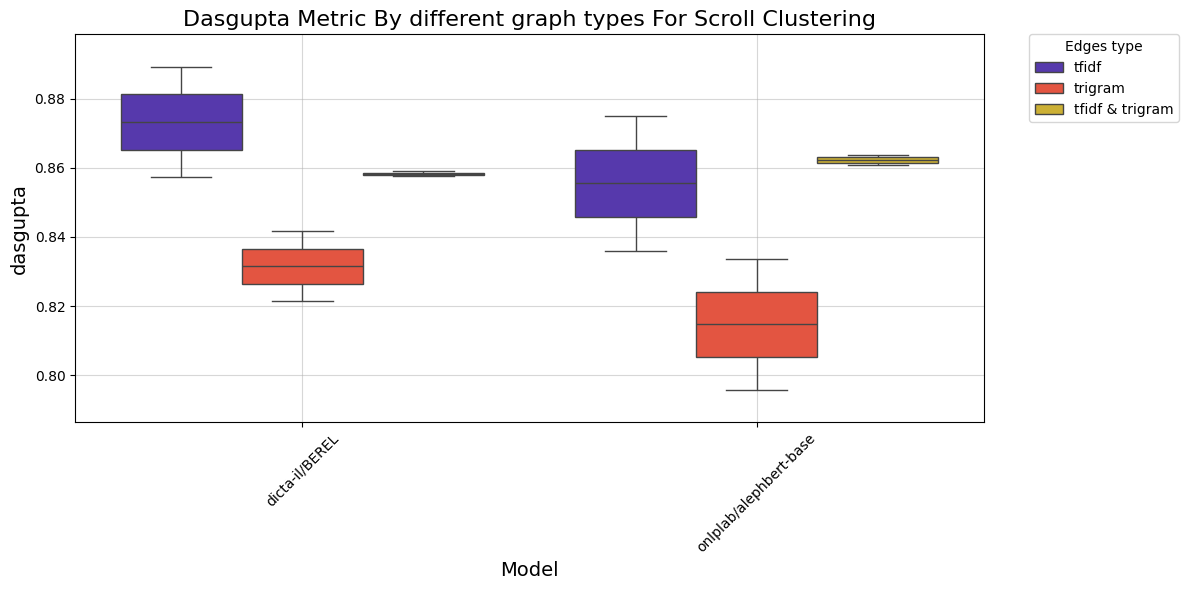

/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_40619/952325154.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_results['task'] = all_results['task'].replace("section", "sectarian")


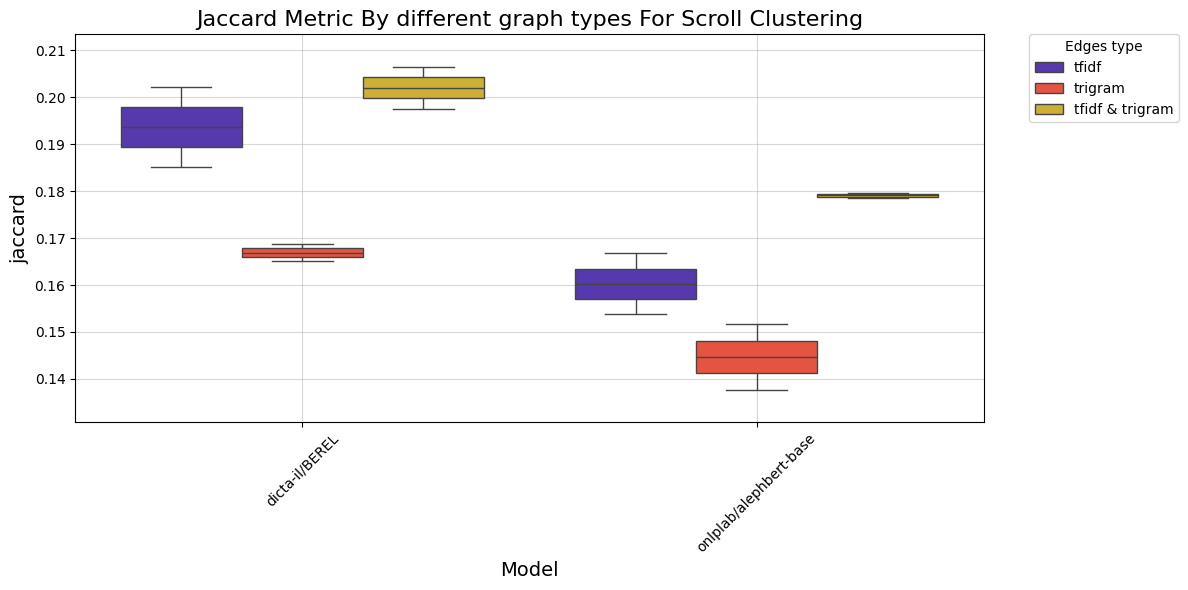

/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_40619/952325154.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_results['task'] = all_results['task'].replace("section", "sectarian")


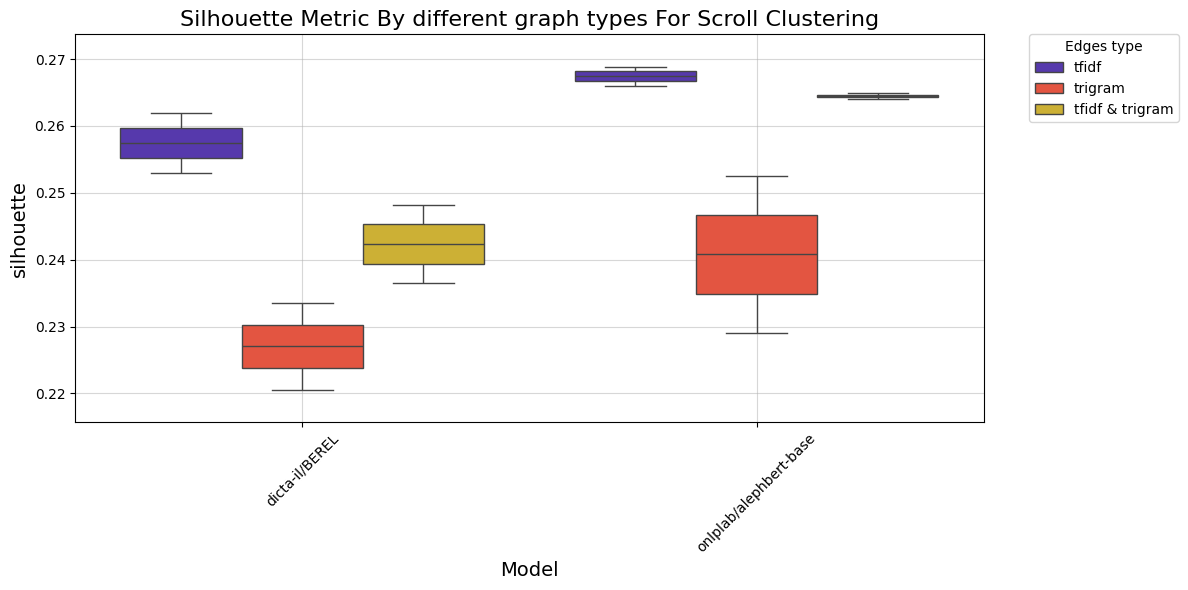

In [23]:
adj_types = all_results_gnn['adj_type'].unique()
palette = sns.color_palette("CMRmap", len(adj_types))
color_dict = dict(zip(adj_types, palette))
# file_name = f"{BASE_DIR}/experiments/dss/gnn/comparsion_plot_all_tasks_different_adj.png"
file_name = None
for metric in ["dasgupta", "jaccard", "silhouette"]:
    all_results_gnn_tmp = all_results_gnn[all_results_gnn["vectorizer"].isin(["dicta-il/BEREL", "onlplab/alephbert-base"])]
    generate_box_plot(all_results_gnn_tmp, "vectorizer", metric, "adj_type", "num_adjs", color_dict, filename=file_name,
                      which_hue_cols=None)